<b>About the dataset:</b>

The dataset is publically available on the Kaggle website, and it is from an ongoing ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,240 records and 15 attributes.

<h2>Packages and Reading Data</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# importing all the necessary libraries
import numpy as np
import pandas as pd
# plotly for data visualization
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objects as go

from sklearn.feature_selection import chi2  
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler

from sklearn import model_selection
from sklearn import metrics

from sklearn import tree
from sklearn import linear_model
from sklearn import ensemble
warnings.filterwarnings("ignore", category=FutureWarning)

pd.set_option("max_rows",1000000)
pd.set_option("max_columns",100)

In [2]:
hd_data = pd.read_csv("framingham.csv")

In [3]:
hd_data.shape

(4240, 16)

<b>Attributes:</b>

1. sex: male(0) or female(1);(Nominal)

2. age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

3. currentSmoker: whether or not the patient is a current smoker (Nominal)

4. cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

5. BPMeds: whether or not the patient was on blood pressure medication (Nominal)

6. prevalentStroke: whether or not the patient had previously had a stroke (Nominal)

7. prevalentHyp: whether or not the patient was hypertensive (Nominal)

8. diabetes: whether or not the patient had diabetes (Nominal)

9. totChol: total cholesterol level (Continuous)

10. sysBP: systolic blood pressure (Continuous)

11. diaBP: diastolic blood pressure (Continuous)

12. BMI: Body Mass Index (Continuous)

13. heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

14. glucose: glucose level (Continuous)

15. 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”) - Target Variable

In [5]:
hd_data.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

<h2>Data Cleaning</h2>

<h3>Duplicates</h3>

In [54]:
hd_data = hd_data[hd_data.duplicated()]
hd_data

Empty DataFrame
Columns: [male, age, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

<b>There are no duplicate values in the data</b>

In [6]:
hd_data.select_dtypes(include=['int','float']).dtypes

education     float64
cigsPerDay    float64
BPMeds        float64
totChol       float64
sysBP         float64
diaBP         float64
BMI           float64
heartRate     float64
glucose       float64
dtype: object

In [7]:
hd_data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

<h3>Null Values</h3>

In [12]:
hd_data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [14]:
hd_data.isna().sum()/hd_data.shape[0] *100

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

<b>Null Values in Data</b>
<ul>
  <li>glucose has 9.1% of null Values(388)</li>
  <li>Education has 2.47% of null values(105)</li>
  <li>BPMeds has 1.25% of null values(53)</li>
  <li>totChol has 1.17% of null values(50)</li>
<li>cigsPerDay  has 0.67% of null values(29)</li>
<li>BMI  has 0.44% of null values(19)</li> 
<li>HeartRate  has 0.02% of null values(1)</li> 
</ul>

In [6]:
hd_data_copy = hd_data.copy()

In [7]:
#Total Number of rows with Null values
hd_data_copy['Null_percent_Row'] = hd_data.isnull().sum(axis=1)/hd_data.shape[1]*100

In [53]:
hd_data_copy.loc[lambda df: (df.TenYearCHD==0) & (df.Null_percent_Row>0) ].shape

(495, 17)

In [52]:
hd_data_copy.loc[lambda df: (df.TenYearCHD==1) & (df.Null_percent_Row>0) ].shape

(87, 17)

In [41]:
hd_data_copy.TenYearCHD.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

In [51]:
hd_data_copy.loc[lambda df: (df.totChol.isnull() ) & (df.glucose.isnull())].shape

(40, 17)

<h2>Observations</h2>

<ul>
  <li>80% of the times when totChol is null then glucose is also null</li>
  <li>87 rows of the data is null when TenYearCHD is 1, which means 13.5% of the data</li>  
  <li>495 rows of the data is null when TenYearCHD is 0, which means 13.7% of the data</li> 
  <li>Null values are equally distributed among the Positive and Negative classes, but the classes being imbalanced we can remove the samples in the negative data and impute the data points in positive data</li> 
</ul>

<h3>Outliers</h3>

In [55]:
cols = ['age','BMI','heartRate','glucose','sysBP','totChol','diaBP']

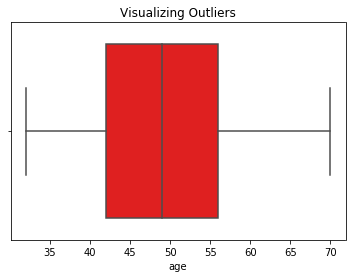

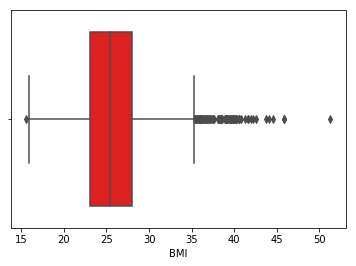

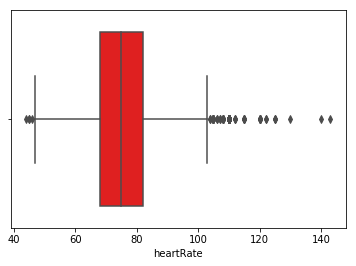

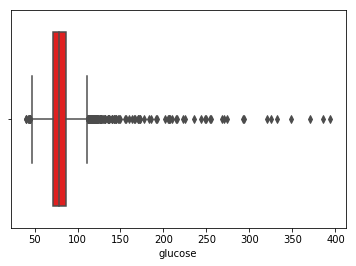

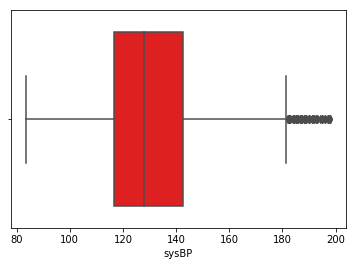

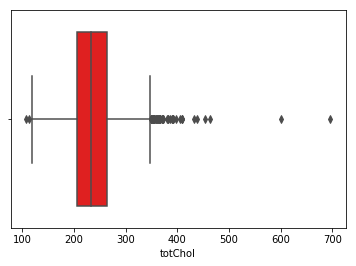

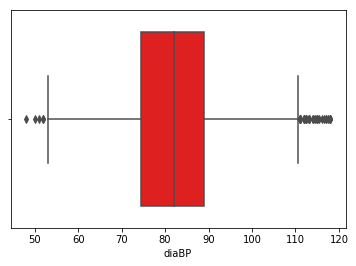

In [100]:
plt.title('Visualizing Outliers')
for i in cols:
    hd_data[i]
    sns.boxplot(hd_data_final[i],color='Red')
    plt.show()

In [96]:
#Zscore Values
from scipy import stats
import numpy as np
index_list=[]
for i in cols:
    z=np.abs(stats.zscore(hd_data[i]))
    index_list.extend(np.where(z>3)[0])

<h3>Removing Outliers using Zscore method </h3>

In [98]:
#taking final data
import numpy as np
hd_data_final = hd_data.loc[np.setdiff1d(hd_data.index.tolist(),index_list)].copy()

In [99]:
hd_data_final.shape

(4171, 16)

In [103]:
hd_data = hd_data.dropna()

<h2>EDA</h2>

In [94]:
hd_data.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4240.000000  4240.000000  4135.000000    4240.000000  4211.000000   
mean      0.429245    49.580189     1.979444       0.494104     9.005937   
std       0.495027     8.572942     1.019791       0.500024    11.922462   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4187.000000      4240.000000   4240.000000  4240.000000  4190.000000   
mean      0.029615         0.005896      0.310613     0.025708   236.699523   
std       0.169544         0.076569      0.462799     0.158280    44.591284   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4240.000000  4240.000000  4221.000000  4239.000000  3852.000000   
mean    132.354599    82.897759    25.800801    75.878981    81.963655   
std      22.033300    11.910394     4.079840    12.025348    23.954335   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    90.000000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4240.000000  
mean      0.151887  
std       0.358953  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

<h3>Class Imbalance</h3>

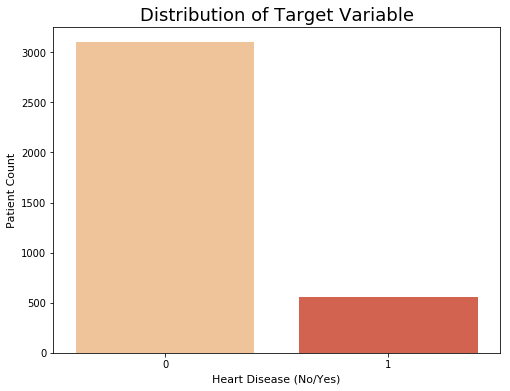

In [105]:
plt.figure(figsize= (8,6))
sns.countplot(hd_data.TenYearCHD,palette='OrRd')
plt.title('Distribution of Target Variable',fontsize=18)
plt.xlabel('Heart Disease (No/Yes)',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)

plt.show()

<h3>Checking Data Distributions</h3>

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


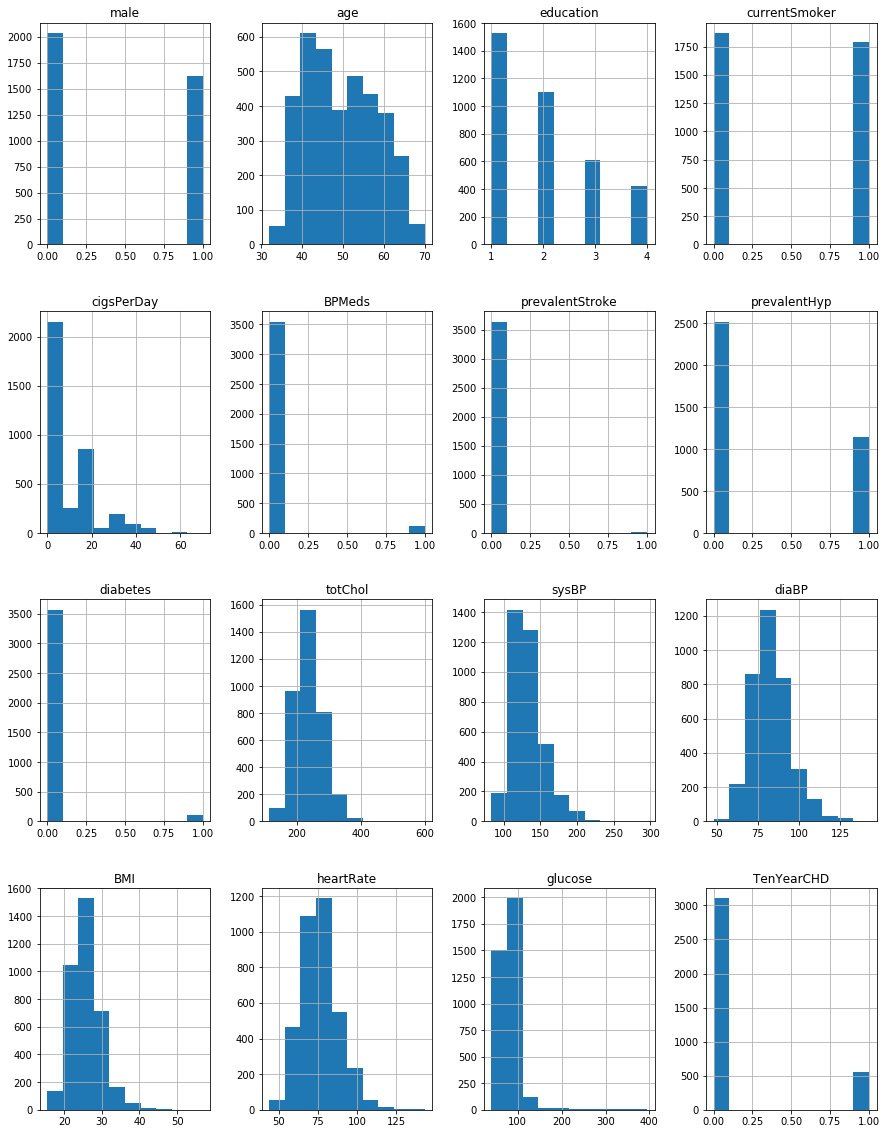

In [110]:
# checking distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
hd_data.hist(ax = ax)
plt.show()

<b>Observations</b>
Few columns like BPMeds, PrevalentBP, PrevalentHyper tension , glucose,diabetes and cigs per day are skewed 

<h2>Univariate Analysis</h2>

In [111]:
hd_data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Plotting between  male  and TenYearCHD


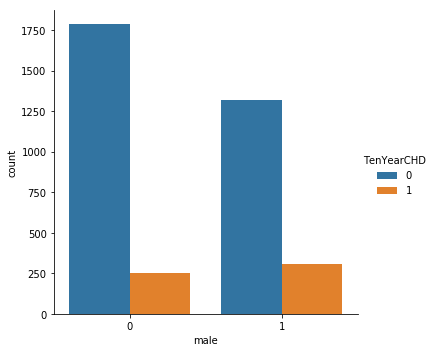

Plotting between  education  and TenYearCHD


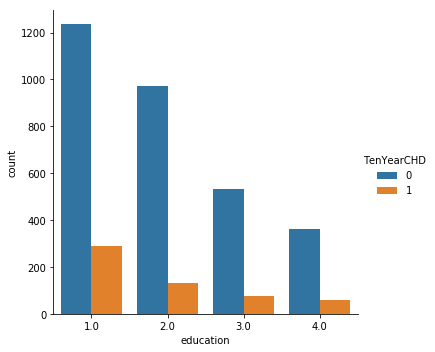

Plotting between  currentSmoker  and TenYearCHD


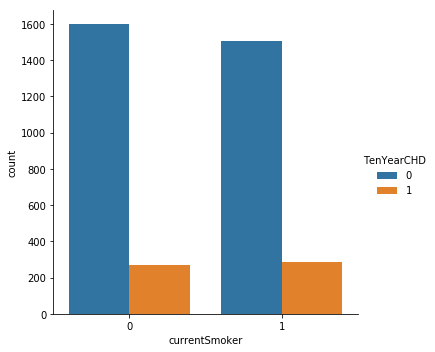

Plotting between  BPMeds  and TenYearCHD


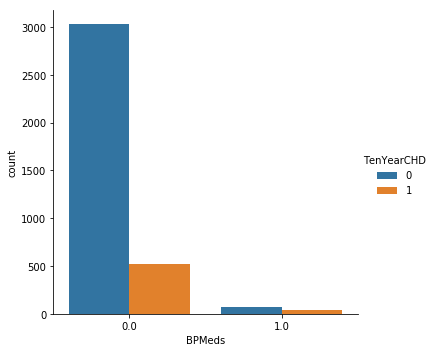

Plotting between  prevalentStroke  and TenYearCHD


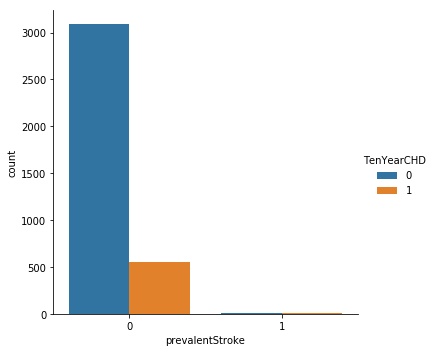

Plotting between  prevalentHyp  and TenYearCHD


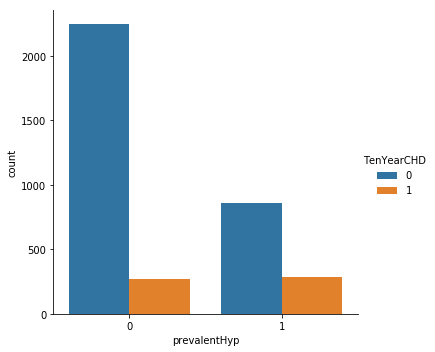

Plotting between  diabetes  and TenYearCHD


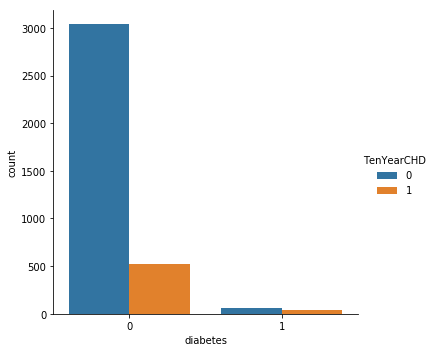

In [133]:
cat_cols = ['male','education', 'currentSmoker','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']
for i in cat_cols:
    print("Plotting between ",i , ' and TenYearCHD')
    sns.catplot(x=i, hue="TenYearCHD", kind="count",  data=hd_data)
    plt.show()

<b>Observations</b>

BPMeds,Prevalent Stroke, Diabetes are the are the columns where there are almost unequal number of data points present, hence these columns can be completely removed from the modelling

<h3>Age vs TenYearCHD</h3>

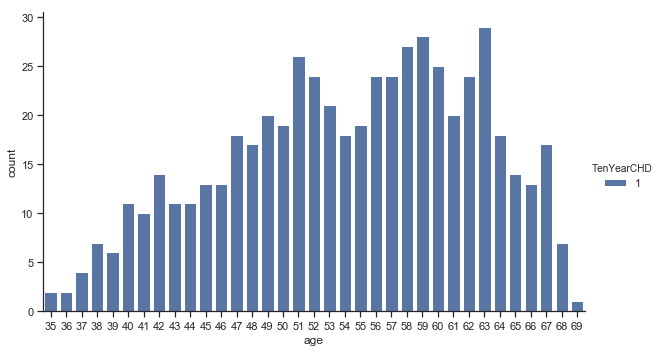

In [169]:
%matplotlib inline
import seaborn as sns
sns.set_style('ticks')
sns.catplot(x="age", kind="count", hue="TenYearCHD", aspect=13/8,data=hd_data.loc[lambda df: df.TenYearCHD==1])

<b>Observation</b>

It is seen here that as age increases , the chances of having CHD is icreaseing, so age is one of the prominent factors in the analysis.

In [179]:
hd_data['cigsPerDay']=hd_data['cigsPerDay'].astype(int)

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


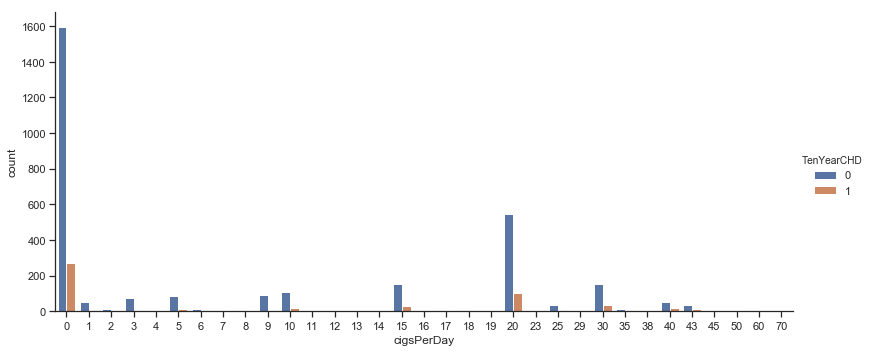

In [180]:
%matplotlib inline
import seaborn as sns
sns.set_style('ticks')
sns.catplot(x="cigsPerDay", y="count", hue="TenYearCHD", kind="bar",aspect=18/8,data=hd_data.groupby(['cigsPerDay','TenYearCHD'])['TenYearCHD'].agg(['count']).reset_index())

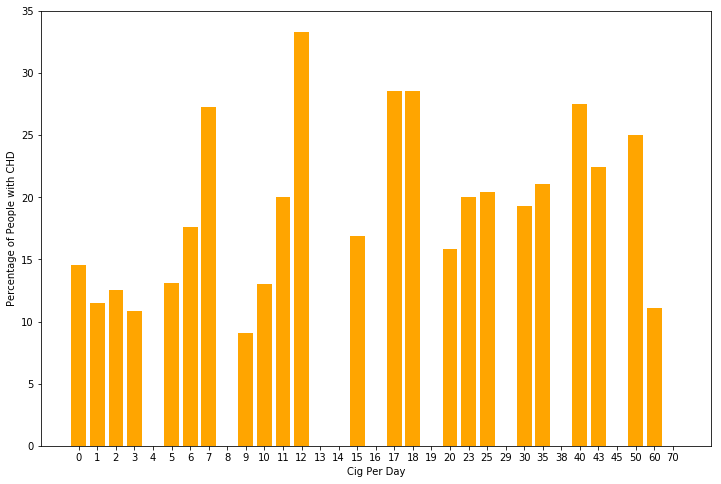

In [104]:
#cigsperday vs target
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,8),facecolor='white')
dist = hd_data['cigsPerDay'].value_counts()
cigs = [int(x) for x in sorted(dist.index)] 
chdCount = dict(map(lambda x: [x,0],cigs))

for t,c in zip(hd_data['TenYearCHD'],hd_data['cigsPerDay']):
    chdCount[c] += t
rates = [(chdCount[c] / float(dist.loc[c]))*100 for c in cigs]

x = np.arange(len(cigs))


ax.bar(x,rates,color = 'Orange')
ax.set_xticks(x)
ax.set_xticklabels(cigs)
ax.set_xlabel('Cig Per Day')
ax.set_ylabel('Percentage of People with CHD')

plt.show()

<b>Observations</b>

Generally we will imagine that when a person smokes cigarretes a lot, he will be affacted by heart disease.
But the data is telling opposite, even if person smokes o ciggaretes, he has the effect of CHD.

<h3>Numerical Columns analysis</h3>

Plotting between  totChol  and TenYearCHD


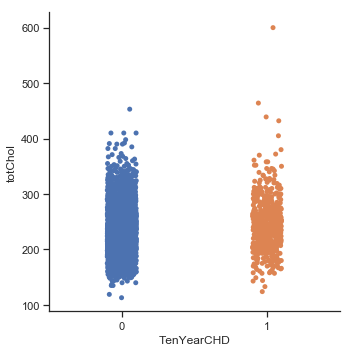

Plotting between  sysBP  and TenYearCHD


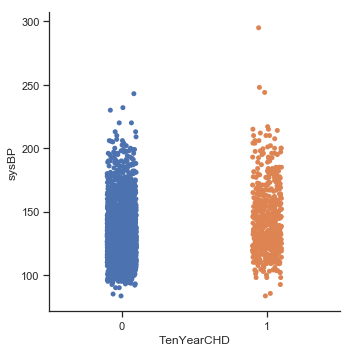

Plotting between  diaBP  and TenYearCHD


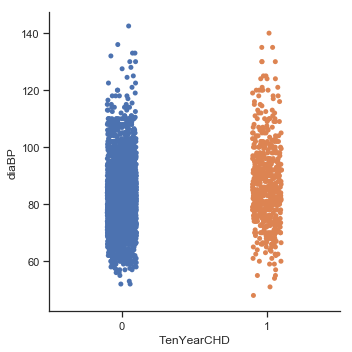

Plotting between  BMI  and TenYearCHD


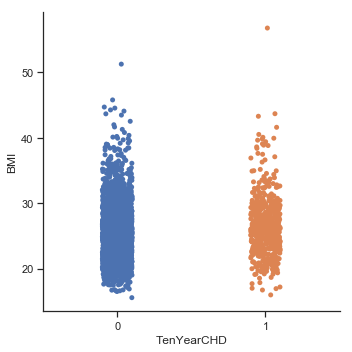

Plotting between  heartRate  and TenYearCHD


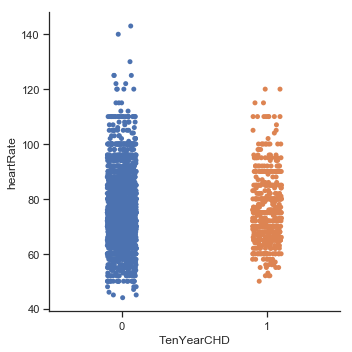

Plotting between  glucose  and TenYearCHD


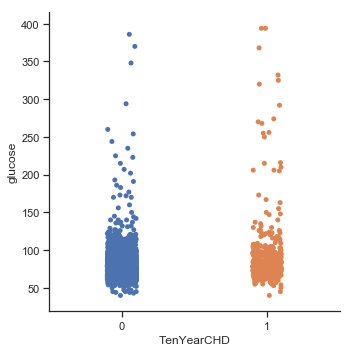

In [183]:
num_cols = ['totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose',]
for i in num_cols:
    print("Plotting between ",i , ' and TenYearCHD')
    sns.catplot(x="TenYearCHD", y=i, data=hd_data);
    plt.show()

<h2>Bivariate Analysis</h2>

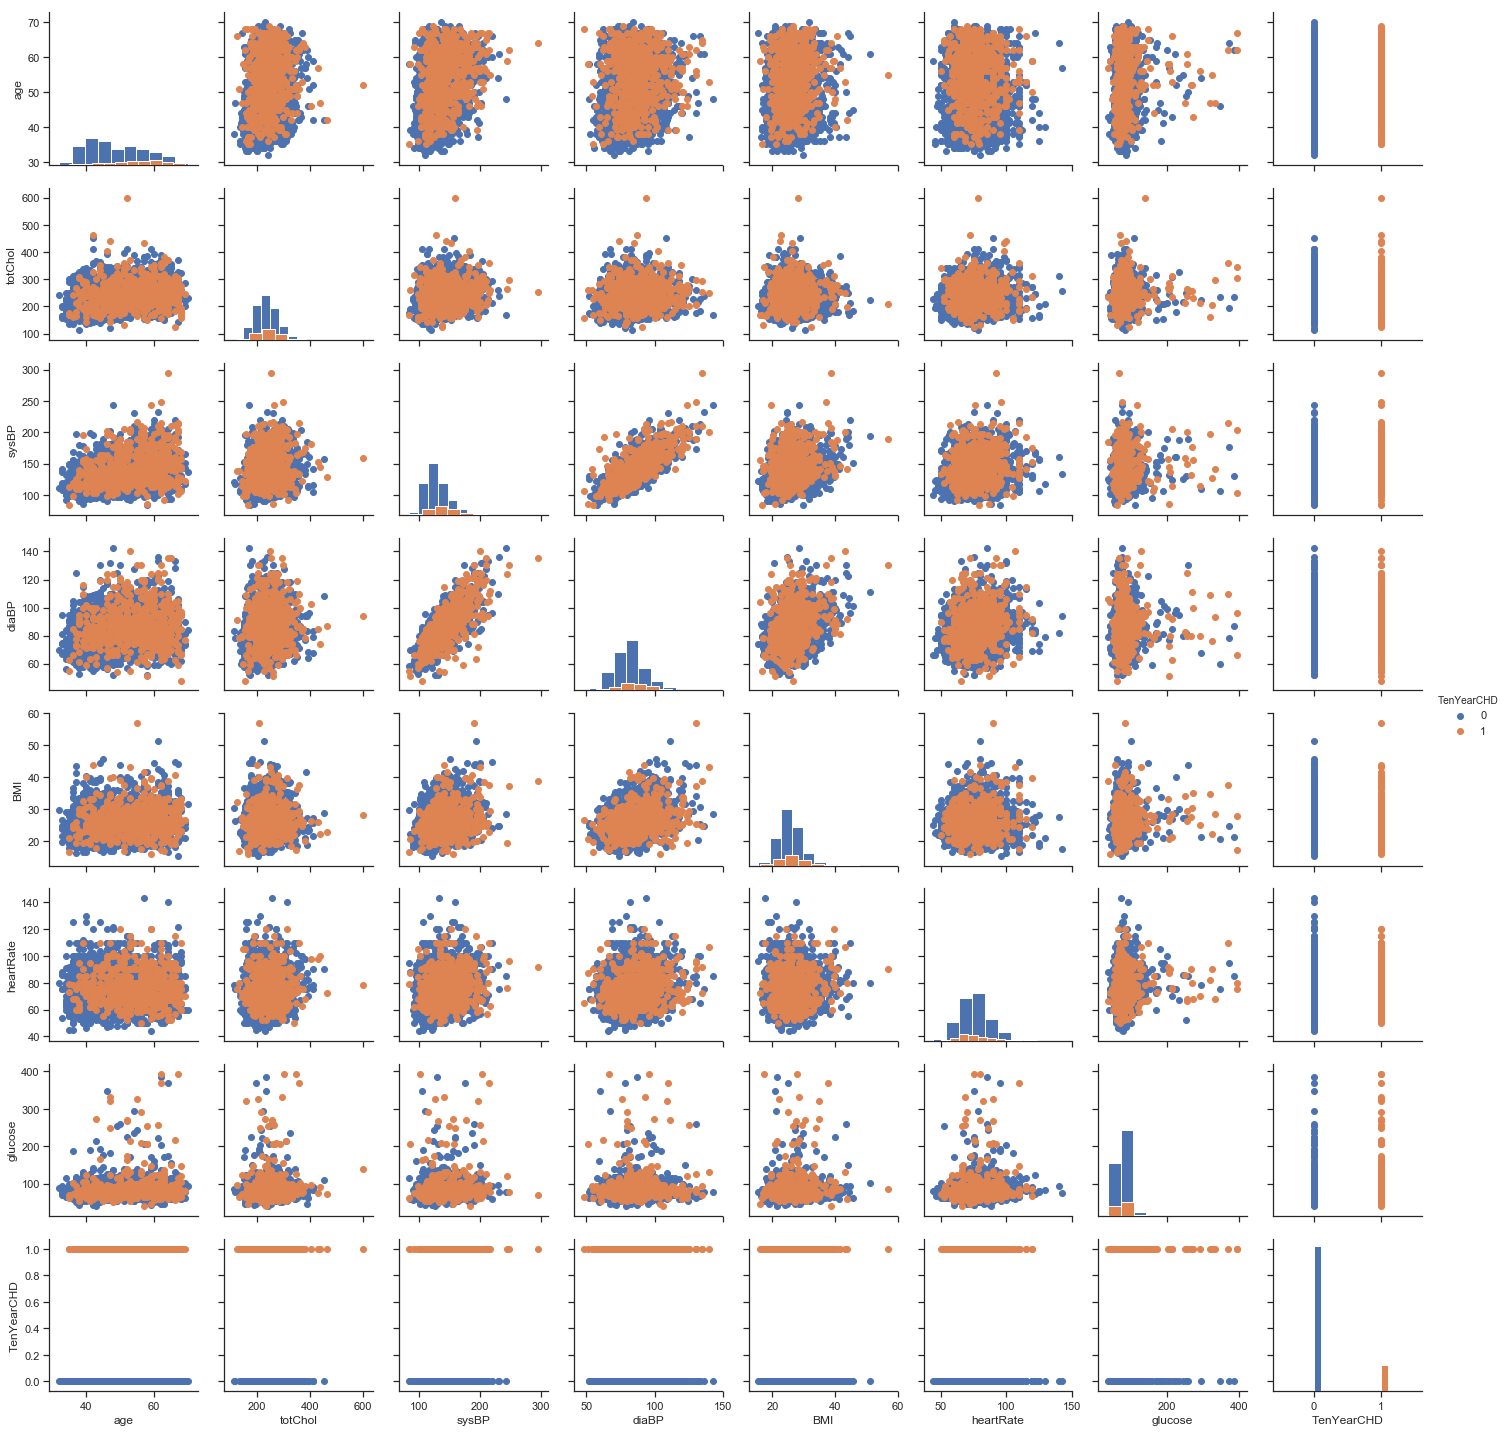

In [190]:
num_cols = ['age','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']
g = sns.PairGrid(hd_data[num_cols], hue="TenYearCHD")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

<b>Observations</b>

The target variable distribution is non linear with most of the independent variables, either a higher dimension visualization or feature engineering with careful feature selection will solve the task.

<h2>Correlation Analysis</h2>

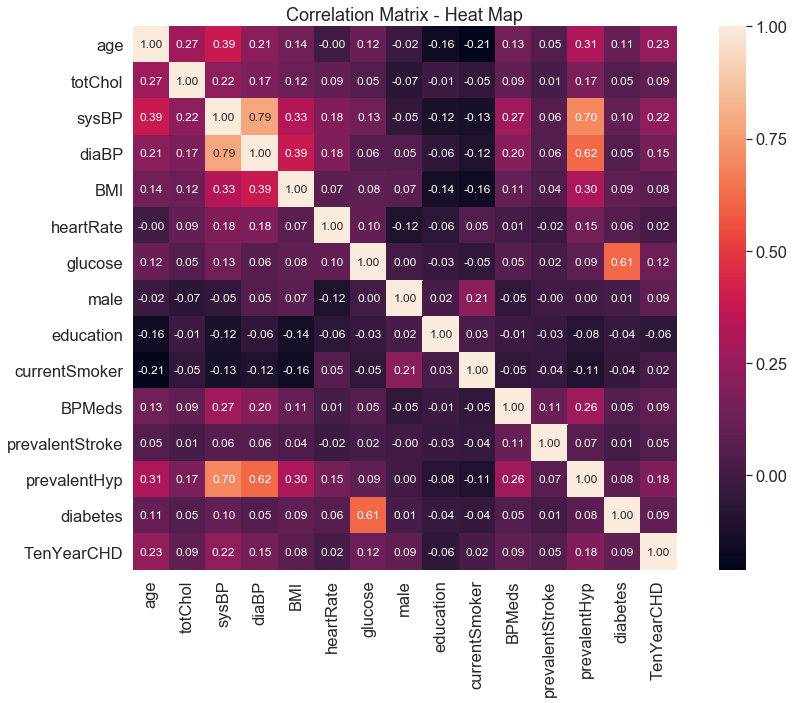

In [195]:
# correlation matrix 
from pylab import rcParams
cols = ['age','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose','male','education', 'currentSmoker','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']
cor_mat = np.corrcoef(hd_data[cols].values.T)
sns.set(font_scale=1.5)
rcParams['figure.figsize'] = 15, 10
heat_map = sns.heatmap(cor_mat,
                       cbar=True,
                       annot=True,
                       square=True,
                       fmt='.2f',
                       annot_kws={'size': 12},
                       yticklabels=cols,
                       xticklabels=cols)
plt.title('Correlation Matrix - Heat Map')
plt.show()

<b>Observations</b>

Age,sysBP,prevalentHyp,diaBP and Glucose are the slightly correlated variables.

Most importantly we can see that lot of variables are multicollinear, hence linear algorithms will have issues with it as it can increase the variance of the coefficient estimates and make the estimates very sensitive to minor changes in the model. 

<h3>Checking multicollinearity</h3>

In [211]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = hd_data[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']]
vif_scores = calc_vif(X)
vif_scores.sort_values(by=['VIF'],ascending=False)

variables       VIF
1              age  5.772727
3    currentSmoker  4.833790
4       cigsPerDay  4.259835
2        education  4.074701
0             male  2.032407
7     prevalentHyp  1.684003
5           BPMeds  1.124386
8         diabetes  1.042729
6  prevalentStroke  1.022402

In [214]:
X = hd_data[['BMI', 'diaBP', 'glucose', 'heartRate', 'sysBP', 'totChol']]
vif_scores = calc_vif(X)
vif_scores.sort_values(by=['VIF'],ascending=False)


variables         VIF
1      diaBP  127.669935
4      sysBP  100.731370
0        BMI   43.078357
3  heartRate   34.242723
5    totChol   27.757671
2    glucose   12.558668

<b>Observations</b>

'BMI','diaBP', 'glucose', 'heartRate', 'sysBP', 'totChol' are the highly multi correlated variables

<h2>Relation between categorical and categorical variables (chi square)</h2>

In [12]:
hd_data_final = hd_data.dropna()

In [13]:
# create a Dataframe only for categorical variables
cat_cols=['male','education', 'currentSmoker','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']
categoricalDF = hd_data_final[cat_cols]
# select only Top 3 variables 
selector = SelectKBest(chi2,k=5)
# give the targetcolumn and the rest of the data to the scalar to fit
selector.fit(categoricalDF,hd_data_final['TenYearCHD'])
# get the indicies of the selected columns
cols = selector.get_support(indices=True)

# For display purpose Only
dfscores = pd.DataFrame(selector.scores_)
dfcolumns = pd.DataFrame(categoricalDF.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
featureScores = featureScores.sort_values(by='Score', ascending=False)
print(featureScores)
# plotting in plotly
# defining data
trace = go.Bar(x=featureScores['Features'],y=featureScores['Score'])
data=[trace]
# defining layout
layout = go.Layout(title='Chi-Score TEST For Categorical Features',xaxis=dict(title='Feature Name'),
                  yaxis=dict(title='Score'),hovermode='closest')
# defining figure and plotting
figure = go.Figure(data=data,layout=layout)
pyo.iplot(figure)

          Features      Score
5     prevalentHyp  82.845455
6         diabetes  31.067621
3           BPMeds  28.191569
0             male  17.107751
4  prevalentStroke   8.507833
1        education   7.733287
2    currentSmoker   0.686474


<b>Observations</b>

prevalentHyp, Diabetes,BPMeds,Gender are the highly correlated categorical variables.
Education and Current Smoker are non important Variables.

<h2>Model Pipeline</h2>

<h3>Removing Outliers as per Zscore</h3>

In [17]:
hd_data.shape

(4240, 16)

In [3]:
#taking final data
from scipy import stats
import numpy as np
index_list=[]
cols = ['age','BMI','heartRate','glucose','sysBP','totChol','diaBP']
for i in cols:
    #print(i)
    z=np.abs(stats.zscore(hd_data[i]))
    index_list.extend(np.where(z>3)[0])
hd_data_final = hd_data.loc[np.setdiff1d(hd_data.index.tolist(),index_list)].copy()

In [4]:
hd_data_final.shape#removed 80 outlier values in total

(4171, 16)

<h3>Imputing Null Values</h3>

In [5]:
#Dropping the negative null values and imputing the positive null values
hd_data_final['TenYearCHD'].value_counts()

0    3561
1     610
Name: TenYearCHD, dtype: int64

In [6]:
#Dropped 490 Null rows
hd_data_final_0 = hd_data_final.loc[lambda df: df['TenYearCHD']==0].dropna().copy()

In [7]:
hd_data_final_0.shape

(3070, 16)

In [8]:
hd_data_final_1 = hd_data_final.loc[lambda df: df['TenYearCHD']==1].copy()

In [9]:
#Imputing the data of positive points with the mean,median,Mode accordingly
hd_data_final_1['education'] = hd_data_final_1['education'].fillna(hd_data_final_1['education'].mode().values[0])
hd_data_final_1['cigsPerDay'] = hd_data_final_1['cigsPerDay'].fillna(round(hd_data_final_1['cigsPerDay'].mean()))
hd_data_final_1['BPMeds'] = hd_data_final_1['BPMeds'].fillna(round(hd_data_final_1['BPMeds'].mode()[0]))
hd_data_final_1['totChol'] = hd_data_final_1['totChol'].fillna(round(hd_data_final_1['totChol'].mean()))
hd_data_final_1['heartRate'] = hd_data_final_1['heartRate'].fillna(round(hd_data_final_1['heartRate'].mean()))
hd_data_final_1['BMI'] = hd_data_final_1['BMI'].fillna(round(hd_data_final_1['BMI'].mean()))
hd_data_final_1['glucose'] = hd_data_final_1['glucose'].fillna(round(hd_data_final_1['glucose'].median()))

In [10]:
hd_data_clean = pd.concat([hd_data_final_0,hd_data_final_1])

<h2>Modelling</h2>

<h3>Applying Linear Models</h3>

<b>Scaling and Removing the non important columns are very vital</b>

In [11]:
selected_cols = ['prevalentHyp', 'diabetes','BPMeds','male','age','cigsPerDay','male','prevalentStroke','TenYearCHD']

<h2>Scaling the Numerical Data</h2>

In [12]:
hd_data_lr = hd_data_clean[selected_cols].copy()

In [13]:
scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
hd_data_scaled = pd.DataFrame(scaler.fit_transform(hd_data_lr), columns=hd_data_lr.columns)

<h3>Utility Functions</h3>

In [14]:
def plot_confusion_matrix(test_y, predict_y):
        test_y = test_y.astype(int)
        predict_y = predict_y.astype(int)
        C = confusion_matrix(test_y, predict_y)
        C = C.astype(int)
        labels = ['NegativeCHD','PositiveCHD']
        print("-"*20, "Confusion matrix", "-"*20)
        plt.figure(figsize=(15,7))
        sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".0f", xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted Class')
        plt.ylabel('Original Class')
        plt.show()

In [15]:
#Hyperparameter tuning the model (Non tree models)
def tuning(model, parameters, parameter_name, train_data_x, train_data_y, plot_values,is_multi=False):
    grid = GridSearchCV(model, parameters, cv = 3, scoring = 'f1_macro',return_train_score=True)
    grid.fit(train_data_x, train_data_y)
    results = pd.DataFrame(grid.cv_results_)           #storing results of gridseachcv in a dataframe to access its elements
    params = results['params']                         #storing combination of parameters used by model in params
    score_tr_array = results['mean_train_score']         #storing scores on train data of model
    score_cv_array = results['mean_test_score']          #storing scores on cv data of model
    for i in range(len(params)):
        print("For", params[i]," acc of Train data is", score_tr_array[i],"and acc of CV data is", score_cv_array[i])
    print('Best Parameter is ',  grid.best_params_)
    print('Best F1 Score is ',  grid.best_score_)
    if not is_multi:
        plt.xlabel(parameter_name)
        plt.title('Cross Validation')
        plt.plot(np.log10(plot_values),grid.cv_results_['mean_train_score'])
        plt.plot(np.log10(plot_values),grid.cv_results_['mean_test_score'])
        plt.legend(['Train Accuracy', 'CV Accuracy'])
        plt.show()
    return grid.best_params_

In [16]:
def tuning_random(model, parameters, parameter_name, train_data_x, train_data_y, plot_values,is_multi=False,extra_params={},model_tags=[]):
        grid = RandomizedSearchCV(model, parameters, cv = 3,n_jobs=-1,scoring = 'f1_macro',refit=True,return_train_score=True)
        if extra_params=={}:
            grid.fit(train_data_x, train_data_y)
        else:
            grid.fit(train_data_x, train_data_y,**extra_params)
        print('Training Completed')  

 

        results = pd.DataFrame(grid.cv_results_)           #storing results of gridseachcv in a dataframe to access its elements
        params = results['params']                         #storing combination of parameters used by model in params
        score_tr_array = results['mean_train_score']         #storing scores on train data of model
        score_cv_array = results['mean_test_score']          #storing scores on cv data of model
    #     for i in range(len(params)):
    #         print("For", params[i]," acc of Train data is", score_tr_array[i],"and acc of CV data is", score_cv_array[i])
        print('Best Parameter is ',  grid.best_params_)
        print('Best F1 Score is ',  grid.best_score_)
        if not is_multi:
            plt.xlabel(parameter_name)
            plt.title('Cross Validation')
            plt.plot(np.log10(plot_values),grid.cv_results_['mean_train_score'])
            plt.plot(np.log10(plot_values),grid.cv_results_['mean_test_score'])
            plt.legend(['Train Accuracy', 'CV Accuracy'])
            plt.show()
        return grid.best_params_

<h3>Train Test Split</h3>

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, log_loss, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression

In [92]:
x_train, x_test, y_train, y_test = train_test_split(hd_data_scaled.loc[:, hd_data_scaled.columns != 'TenYearCHD'], hd_data_scaled[['TenYearCHD']],
                                                    test_size=0.4,
                                                    random_state=0,
                                                    stratify=hd_data_scaled[['TenYearCHD']])

<h2>Logistic Regression Model</h2>

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\va

For {'C': 1e-05}  acc of Train data is 0.4548148148148148 and acc of CV data is 0.4548148148148147
For {'C': 0.0001}  acc of Train data is 0.4548148148148148 and acc of CV data is 0.4548148148148147
For {'C': 0.001}  acc of Train data is 0.4548148148148148 and acc of CV data is 0.4548148148148147
For {'C': 0.01}  acc of Train data is 0.4548148148148148 and acc of CV data is 0.4548148148148147
For {'C': 0.1}  acc of Train data is 0.4548148148148148 and acc of CV data is 0.4548148148148147
For {'C': 1}  acc of Train data is 0.4844894117063728 and acc of CV data is 0.480883527558097
For {'C': 10}  acc of Train data is 0.5004467927276807 and acc of CV data is 0.4941534682432083
For {'C': 100}  acc of Train data is 0.5009246961720744 and acc of CV data is 0.4989627930630106
For {'C': 1000}  acc of Train data is 0.5009246961720744 and acc of CV data is 0.4989627930630106
For {'C': 10000}  acc of Train data is 0.5009246961720744 and acc of CV data is 0.4989627930630106
Best Parameter is  {'C'

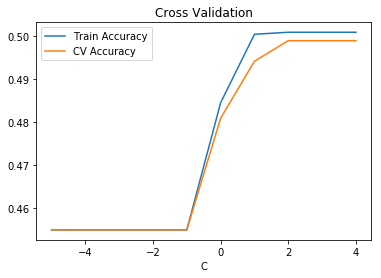

Accuracy of model on testing data is 0.8376358695652174
F1 Score of model on testing data is 0.5010544558738227
Log loss of model on testing data is 0.40718348405095367


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [97]:
model = LogisticRegression()
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alphas = {'C' : alpha}
best_params = tuning(model, alphas, 'C', x_train, y_train, alpha)

best_alpha = best_params['C']
clf = LogisticRegression(C = best_alpha).fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

-------------------- Confusion matrix --------------------


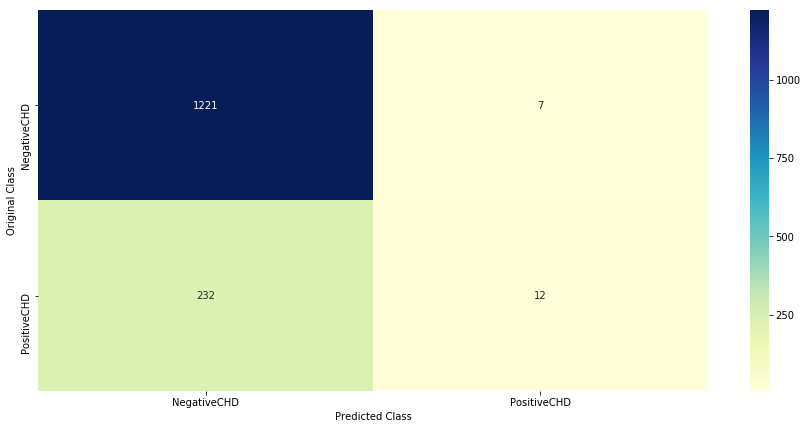

In [122]:
plot_confusion_matrix(y_test, y_pred)

<b>Observations</b>

Logistic Regression is giving High number of False Negative Values

<h2>Non Linear Models</h2>

<h3>Decesion Tree</h3>

In [23]:
x_train, x_test, y_train, y_test = train_test_split(hd_data_clean.loc[:, hd_data_clean.columns != 'TenYearCHD'], hd_data_clean[['TenYearCHD']],
                                                    test_size=0.4,
                                                    random_state=0,
                                                    stratify=hd_data_clean[['TenYearCHD']])

In [141]:
#Hyperparameter tune the XGBOOST model
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
alphas = {'criterion':['gini', 'entropy'],'splitter':['best', 'random'],'max_depth':np.linspace(1,120,60,endpoint=True,dtype=int),'min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),\
          'min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True)
     }
print("Tuning Hyperparameters...")
best_params = tuning_random(model, alphas, 'n_estimators', x_train, y_train, 'params',is_multi=True)
print("Tuning Hyperparameters completed and applying on best model...")
dc_clf = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                        min_samples_split=best_params['min_samples_split'],
                        min_samples_leaf=best_params['min_samples_leaf'],
                        criterion= best_params['criterion'],
                     splitter= best_params['splitter'],random_state=100).fit(x_train, y_train)
y_pred = dc_clf.predict(x_test)
y_pred_proba = dc_clf.predict_proba(x_test)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

Tuning Hyperparameters...
Training Completed
Best Parameter is  {'splitter': 'random', 'min_samples_split': 0.5, 'min_samples_leaf': 0.2, 'max_depth': 89, 'criterion': 'entropy'}
Best F1 Score is  0.4548148148148147
Tuning Hyperparameters completed and applying on best model...
Accuracy of model on testing data is 0.8342391304347826
F1 Score of model on testing data is 0.4548148148148148
Log loss of model on testing data is 0.43484915866056617


-------------------- Confusion matrix --------------------


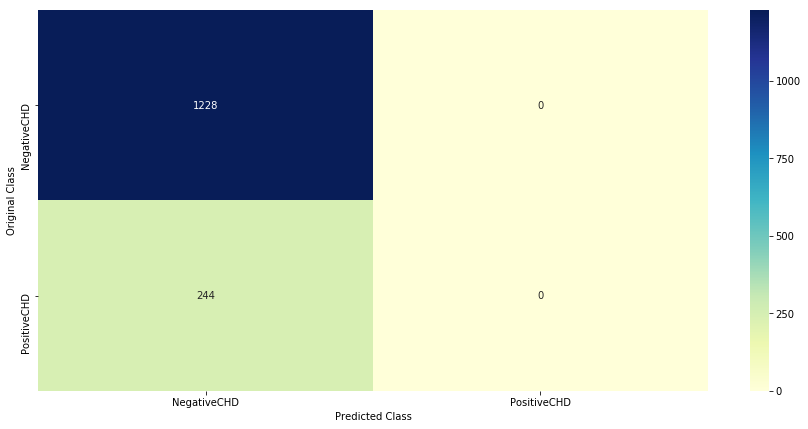

In [142]:
plot_confusion_matrix(y_test, y_pred)

<b>Observations</b>

Model is underfitting , mainly because of data imbalance issues. Reducing the imabalance will help to reduce the issues

<h2>Applying the Undersampling using instance Hardness threshold</h2>

In [80]:
from imblearn.under_sampling import InstanceHardnessThreshold
rus = InstanceHardnessThreshold(sampling_strategy=0.80,random_state=22) 
X_resampled, y_resampled = rus.fit_resample(hd_data_clean.loc[:, hd_data_clean.columns != 'TenYearCHD'], hd_data_clean[['TenYearCHD']])

In [81]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.4,
                                                    random_state=0,
                                                    stratify=y_resampled)

In [82]:
#Hyperparameter tune the XGBOOST model
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
alphas = {'criterion':['gini', 'entropy'],'splitter':['best', 'random'],'max_depth':np.linspace(1,120,60,endpoint=True,dtype=int),'min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),\
          'min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True)
     }
print("Tuning Hyperparameters...")
best_params = tuning_random(model, alphas, 'n_estimators', x_train, y_train, 'params',is_multi=True)
print("Tuning Hyperparameters completed and applying on best model...")
dc_clf = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                        min_samples_split=best_params['min_samples_split'],
                        min_samples_leaf=best_params['min_samples_leaf'],
                        criterion= best_params['criterion'],
                     splitter= best_params['splitter'],random_state=100).fit( x_train, y_train)
y_pred = dc_clf.predict(x_test)
y_pred_proba = dc_clf.predict_proba(x_test)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

Tuning Hyperparameters...
Training Completed
Best Parameter is  {'splitter': 'best', 'min_samples_split': 0.7000000000000001, 'min_samples_leaf': 0.4, 'max_depth': 91, 'criterion': 'gini'}
Best F1 Score is  0.7959223720944998
Tuning Hyperparameters completed and applying on best model...
Accuracy of model on testing data is 0.8184931506849316
F1 Score of model on testing data is 0.8153662610355524
Log loss of model on testing data is 0.46601599979714464


-------------------- Confusion matrix --------------------


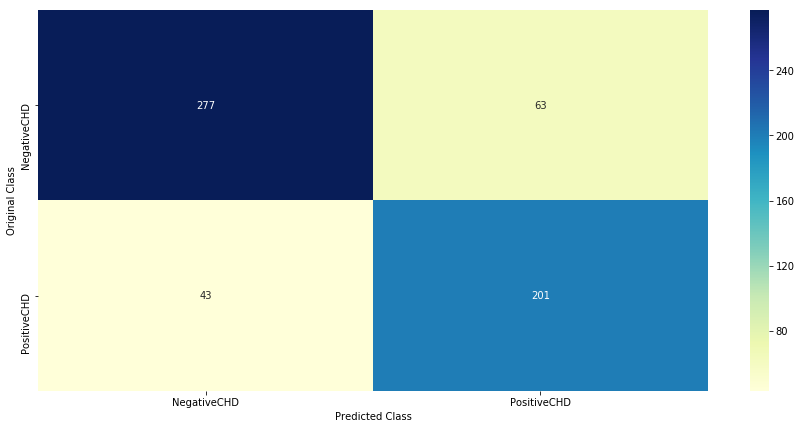

In [83]:
plot_confusion_matrix(y_test, y_pred)

<h2>Random Forest</h2>

In [84]:
from sklearn.ensemble import RandomForestClassifier
#Hyperparameter tune the XGBOOST model
warnings.filterwarnings("ignore")
model=RandomForestClassifier()

alphas = {'bootstrap': [True, False],'criterion':['gini', 'entropy'],'max_depth':np.linspace(1,120,60,endpoint=True,dtype=int),'min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),\
          'min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True),
           'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
          'max_features': ['auto', 'sqrt'],
     }
print("Tuning Hyperparameters...")
best_params = tuning_random(model, alphas, 'n_estimators',x_train, y_train, 'params',is_multi=True)
print("Tuning Hyperparameters completed and applying on best model...")
rf_clf = RandomForestClassifier(bootstrap=best_params['bootstrap'],max_depth=best_params['max_depth'],
                        min_samples_split=best_params['min_samples_split'],
                        min_samples_leaf=best_params['min_samples_leaf'],
                        criterion= best_params['criterion'],n_estimators= best_params['n_estimators'],
                     max_features=best_params['max_features'],random_state=100).fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)
y_pred_proba = rf_clf.predict_proba(x_test)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

Tuning Hyperparameters...
Training Completed
Best Parameter is  {'n_estimators': 1600, 'min_samples_split': 0.30000000000000004, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 97, 'criterion': 'gini', 'bootstrap': False}
Best F1 Score is  0.8196605857956433
Tuning Hyperparameters completed and applying on best model...
Accuracy of model on testing data is 0.8527397260273972
F1 Score of model on testing data is 0.8471166958893435
Log loss of model on testing data is 0.4365163998251838


-------------------- Confusion matrix --------------------


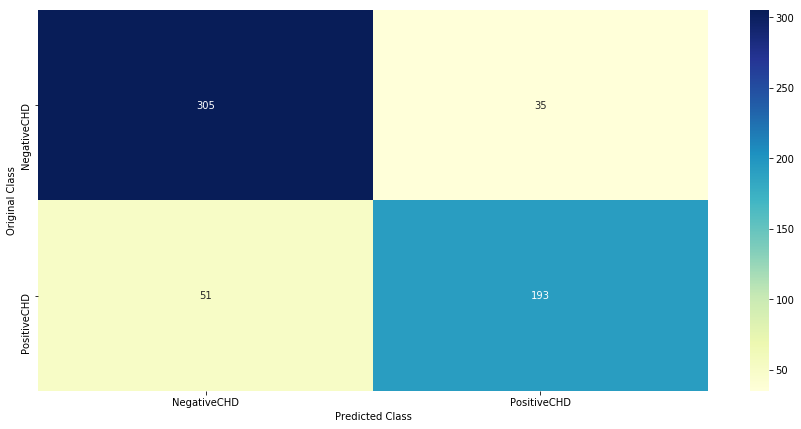

In [85]:
plot_confusion_matrix(y_test, y_pred)

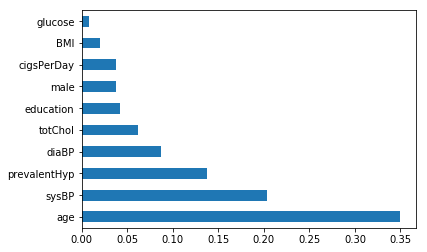

In [89]:
feat_importances = pd.Series(rf_clf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

<h2>XGBOOST</h2>

In [86]:
from xgboost import XGBClassifier
model=XGBClassifier()
alphas = {'learning_rate': np.linspace(0,1,10,endpoint=True),'n_estimators':[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
                 'booster': ['gbtree'], 'min_child_weight': [0.1, 0.5, 1, 1.5],
          'min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),
          'min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True),
     'max_depth':np.linspace(1,120,60,endpoint=True,dtype=int),
      'gamma':[0.1,0.2,0.3,0.4,0.5],
      'colsample_bytree':[0.2,0.3,0.4,0.5,0.6,0.7],'scale_pos_weight':[1,15,20,25,40,50,75,99,100,100]
     }
print("Tuning Hyperparameters...")
best_params = tuning_random(model, alphas, 'n_estimators', x_train, y_train, 'params',is_multi=True)
print("Tuning Hyperparameters completed and applying on best model...")
xg_clf = XGBClassifier(max_depth=best_params['max_depth'],
                learning_rate=best_params['learning_rate'],
                        n_estimators=best_params['n_estimators'],
                        booster= best_params['booster'],
                        min_child_weight=best_params['min_child_weight'],
                gamma=best_params['gamma'],min_samples_split=best_params['min_samples_split'],
                        min_samples_leaf=best_params['min_samples_leaf'],
                        colsample_bytree= best_params['colsample_bytree'],
                     scale_pos_weight= best_params['scale_pos_weight'],random_state=100).fit(x_train, y_train)
y_pred = xg_clf .predict(x_test)
y_pred_proba = xg_clf .predict_proba(x_test)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

Tuning Hyperparameters...
Training Completed
Best Parameter is  {'scale_pos_weight': 15, 'n_estimators': 2000, 'min_samples_split': 0.5, 'min_samples_leaf': 0.5, 'min_child_weight': 0.5, 'max_depth': 87, 'learning_rate': 0.2222222222222222, 'gamma': 0.1, 'colsample_bytree': 0.5, 'booster': 'gbtree'}
Best F1 Score is  0.8491446374814932
Tuning Hyperparameters completed and applying on best model...
Accuracy of model on testing data is 0.8801369863013698
F1 Score of model on testing data is 0.8770866406888921
Log loss of model on testing data is 0.3754386267505418


-------------------- Confusion matrix --------------------


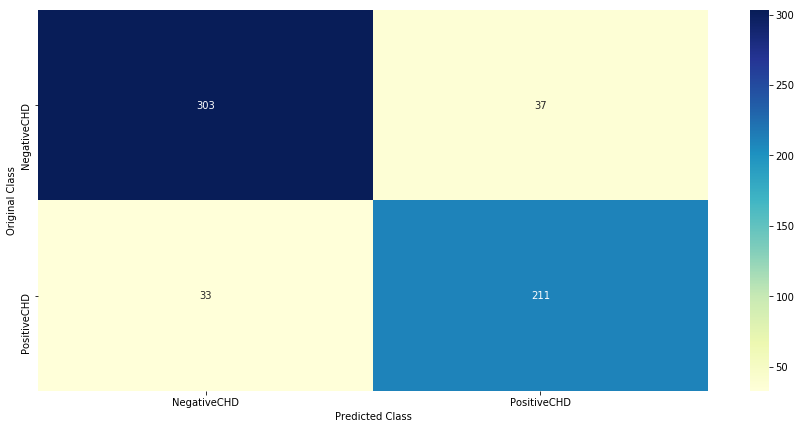

In [87]:
plot_confusion_matrix(y_test, y_pred)

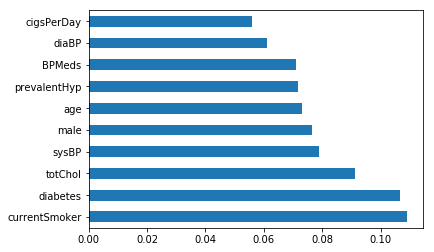

In [90]:
feat_importances = pd.Series(xg_clf.feature_importances_,x_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

<h2>Model Performances</h2>

In [93]:
pd.DataFrame(np.array([['Logistic Regression','Decesion Tree','Decesion Tree','Random Forest','XGBOOST'],[0.54,0.40,81.5,84.7, 87.7],['N','N','Y','Y','Y']]).T,columns=['Model','F1 Score','Undersampled'])

Model F1 Score Undersampled
0  Logistic Regression     0.54            N
1        Decesion Tree      0.4            N
2        Decesion Tree     81.5            Y
3        Random Forest     84.7            Y
4              XGBOOST     87.7            Y

<h2>Summary</h2>

<b>XGBOOST is giving the best F1-Score of 87.7%</b><br>
<b>We can see that CHD positive errors rate is drastically reduced after Undersampling using instance Hardness technique</b><br>


<b>Further Improvements:</b>

We can improve the model prediction power by feature engineering on the columns or mathematical transformation could help.

Forward feature selection and Backward feature selection methods can be implemented.

A neural network implementation could improve the predictive power